In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
DDoS = pd.read_csv('/content/dataset_sdn.csv')
DDoS.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [3]:
DDoS.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [4]:
#Transformations of categorical features
DDoS['Protocol'] = DDoS['Protocol'].astype('category')
DDoS['src'] = DDoS['src'].astype('category')
DDoS['dst'] = DDoS['dst'].astype('category')

cat_columns = DDoS.select_dtypes(['category']).columns
DDoS[cat_columns] = DDoS[cat_columns].apply(lambda x: x.cat.codes)

In [5]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [6]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [7]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import tensorflow
model=tensorflow.keras.models.Sequential()
#Hidden layer definitions
model.add(tensorflow.keras.layers.Dense(units=22, activation='relu', input_shape = X_train.shape[1:]))
model.add(tensorflow.keras.layers.Dense(units=30, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(units=30, activation='relu' ))
model.add(tensorflow.keras.layers.Dropout(0.2))
#OP layer
model.add(tensorflow.keras.layers.Dense(units=2, activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 30)                690       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,188
Trainable params: 2,188
Non-trainabl

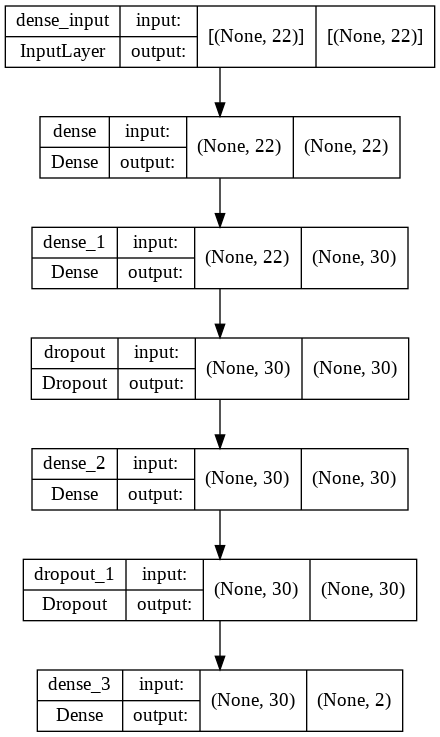

In [11]:
from tensorflow import keras
keras.utils.plot_model(model,show_shapes=True)

In [12]:
#compile
model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [13]:
#fit
history=model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10, batch_size=16)

Epoch 1/10
4696/4696 [==============================] - 15s 3ms/step - loss: 0.1734 - accuracy: 0.9238 - val_loss: 0.0945 - val_accuracy: 0.9602
Epoch 2/10
4696/4696 [==============================] - 21s 4ms/step - loss: 0.0843 - accuracy: 0.9651 - val_loss: 0.0648 - val_accuracy: 0.9734
Epoch 3/10
4696/4696 [==============================] - 25s 5ms/step - loss: 0.0640 - accuracy: 0.9734 - val_loss: 0.0508 - val_accuracy: 0.9774
Epoch 4/10
4696/4696 [==============================] - 17s 4ms/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.0488 - val_accuracy: 0.9792
Epoch 5/10
4696/4696 [==============================] - 14s 3ms/step - loss: 0.0418 - accuracy: 0.9836 - val_loss: 0.0347 - val_accuracy: 0.9855
Epoch 6/10
4696/4696 [==============================] - 12s 3ms/step - loss: 0.0371 - accuracy: 0.9855 - val_loss: 0.0261 - val_accuracy: 0.9907
Epoch 7/10
4696/4696 [==============================] - 11s 2ms/step - loss: 0.0346 - accuracy: 0.9871 - val_loss: 0.0289 - val_ac

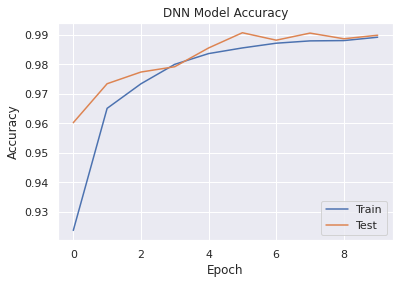

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('DNN Model Accuracy.png')
plt.show()

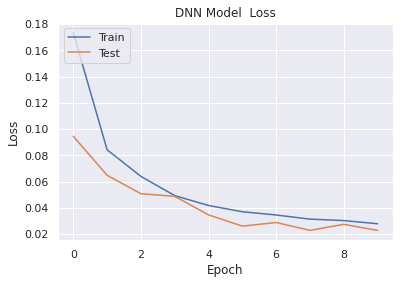

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('DNN Model Loss.png')
plt.show()

In [16]:
predict = model.predict(X_test, verbose=1)

653/653 [==============================] - 1s 1ms/step


In [17]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

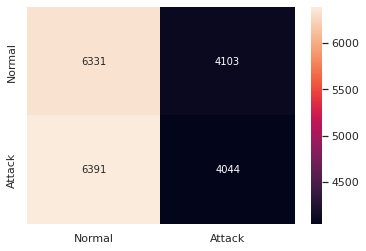

In [18]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Normal","Attack"],columns = ["Normal","Attack"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [21]:
figure = ax.get_figure()    
figure.savefig('confusion_matrix_DNN.png', dpi=400)

In [20]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.93%
